In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import cv2
import cv2
from google.colab import drive
drive.mount('/content/drive')
import imutils
from google.colab.patches import cv2_imshow 
from skimage. filters import threshold_local

Mounted at /content/drive


In [ ]:
import random

In [ ]:
w=np.zeros((4,2))

print(np.shape(w))
for i in range(4):
  for j in range(2):
    w[i][j]+=random.randint(1,9)

(4, 2)


In [ ]:
print(w)
print(w[0])

[[5. 8.]
 [9. 2.]
 [7. 4.]
 [3. 9.]]
[5. 8.]


In [ ]:
r=np.zeros((4,2))
s=w.sum(axis=1)
print(s)

[13. 11. 11. 12.]


In [ ]:
r[0]=w[np.argmin(s)]
r[2]=w[np.argmax(s)]

In [ ]:
difference = np.diff(w, axis = 1)
r[1] = w[np.argmin(difference)]
r[3] = w[np.argmax(difference)]

In [ ]:
print(r)

[[9. 2.]
 [9. 2.]
 [5. 8.]
 [3. 9.]]


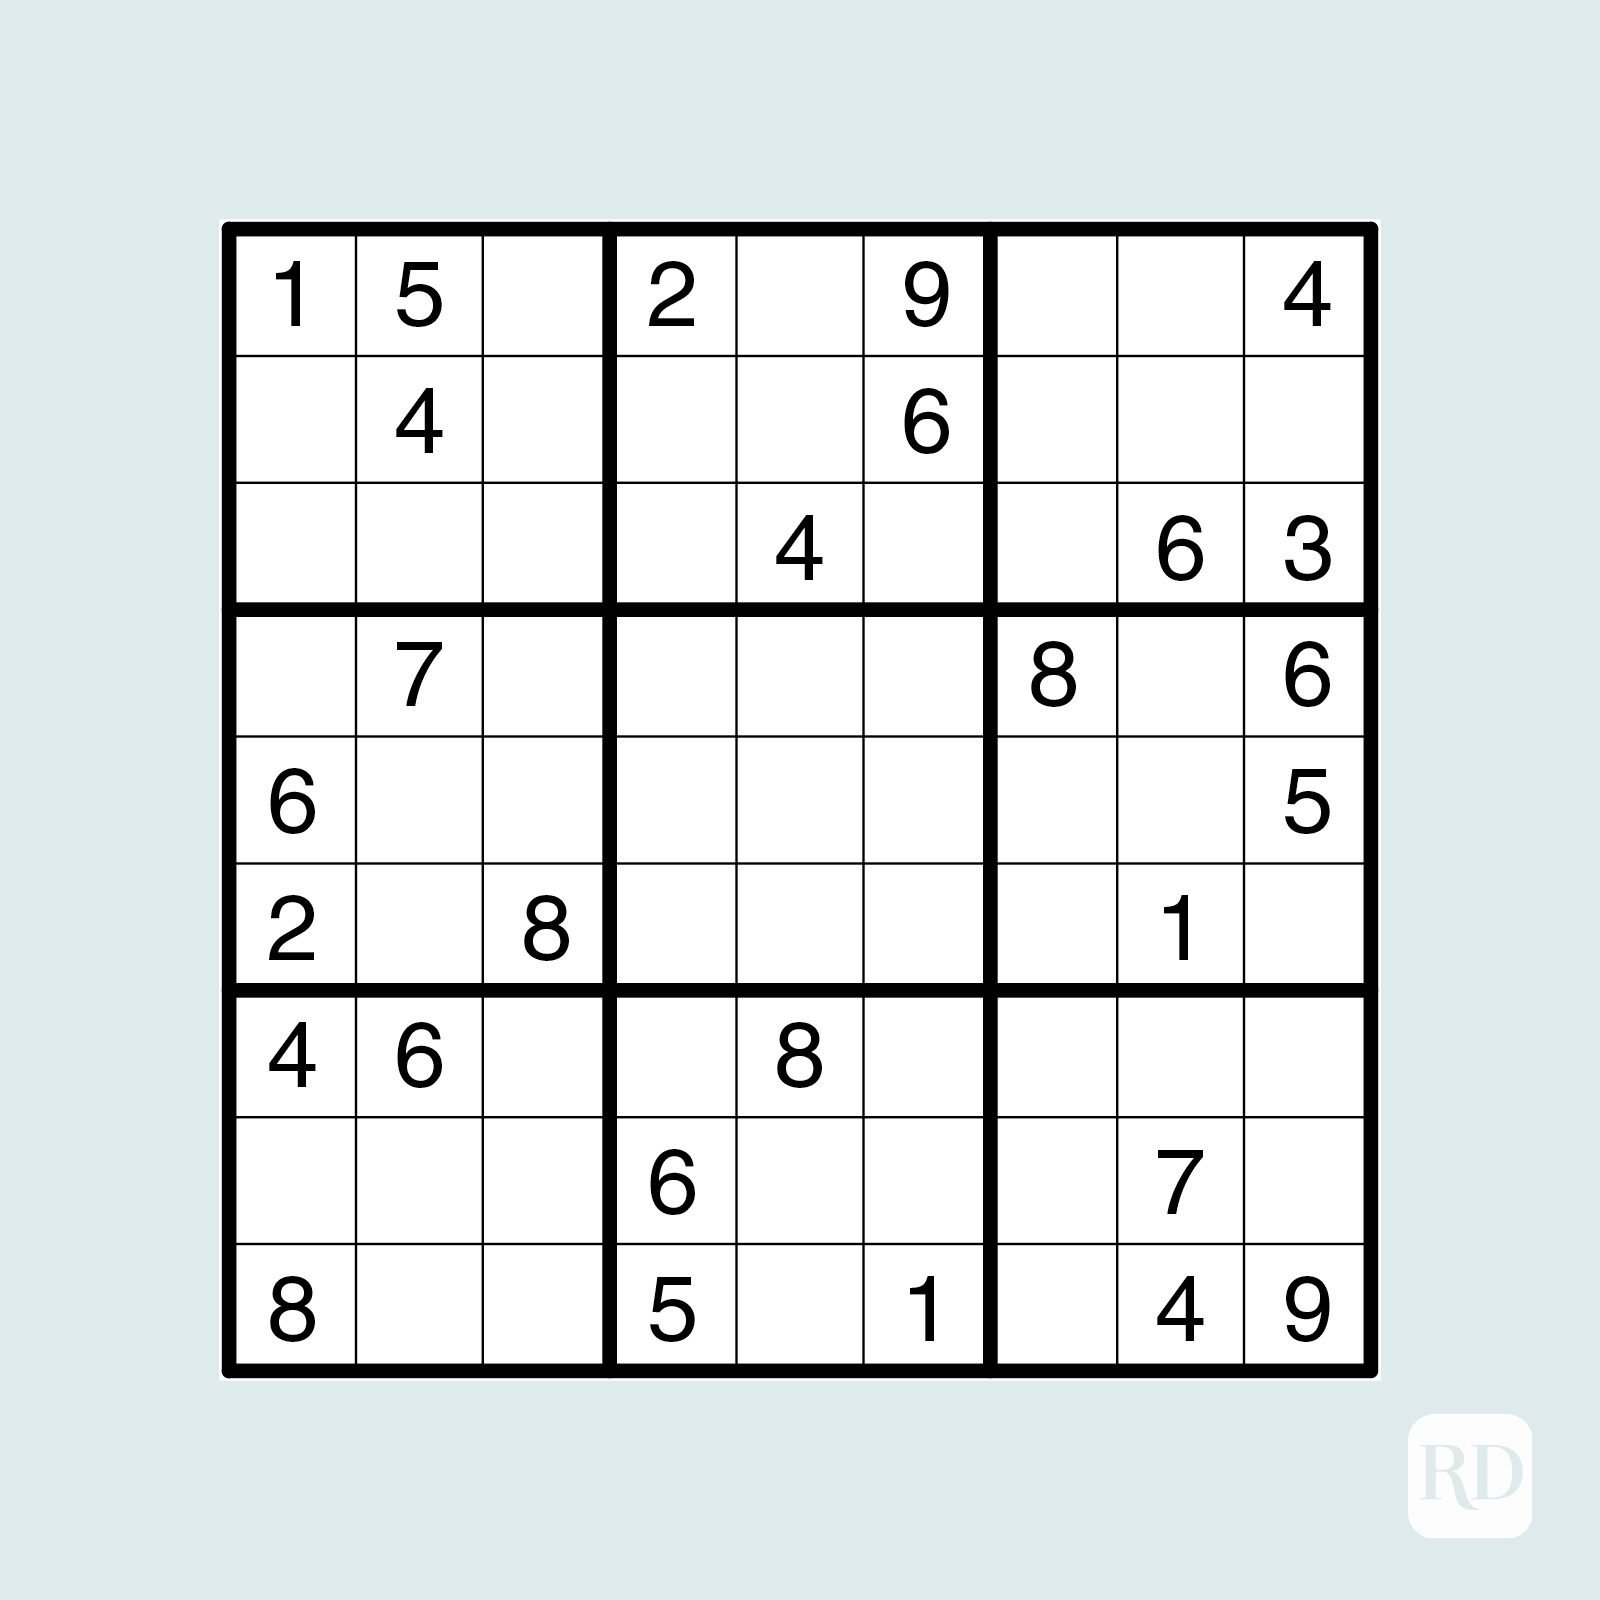

In [ ]:
su= cv2.imread("/content/drive/MyDrive/practice/Sudoku15.jpg")
cv2_imshow(su)

In [ ]:
def get_perspective(img, location, height = 900, width = 900):
#"""Takes an image and location of an interesting region.
#And return the only selected region with a perspective transformation"""
  pts1 = np.float32([location[0], location[3], location[1], location[2]])
  pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
# Apply Perspective Transform Algorithm
  matrix = cv2.getPerspectiveTransform(pts1, pts2)
  result = cv2.warpPerspective(img, matrix, (width, height))
  return result

In [ ]:
def find_board(img):
#"""Takes an image as input and finds a sudoku board inside of the image"""
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  bfilter = cv2.bilateralFilter(gray, 13, 20, 20)
  edged = cv2.Canny(bfilter, 30, 180)
  keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE,
  cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(keypoints)
  newimg = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)
  #cv2_imshow(newimg)
  #contour.png
  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:15]
  location = None
# Finds rectangular contour
  for contour in contours:
    approx = cv2.approxPolyDP(contour, 15, True)
    if len(approx) == 4:
      location = approx
      break
  result = get_perspective(img, location)
  return result, location

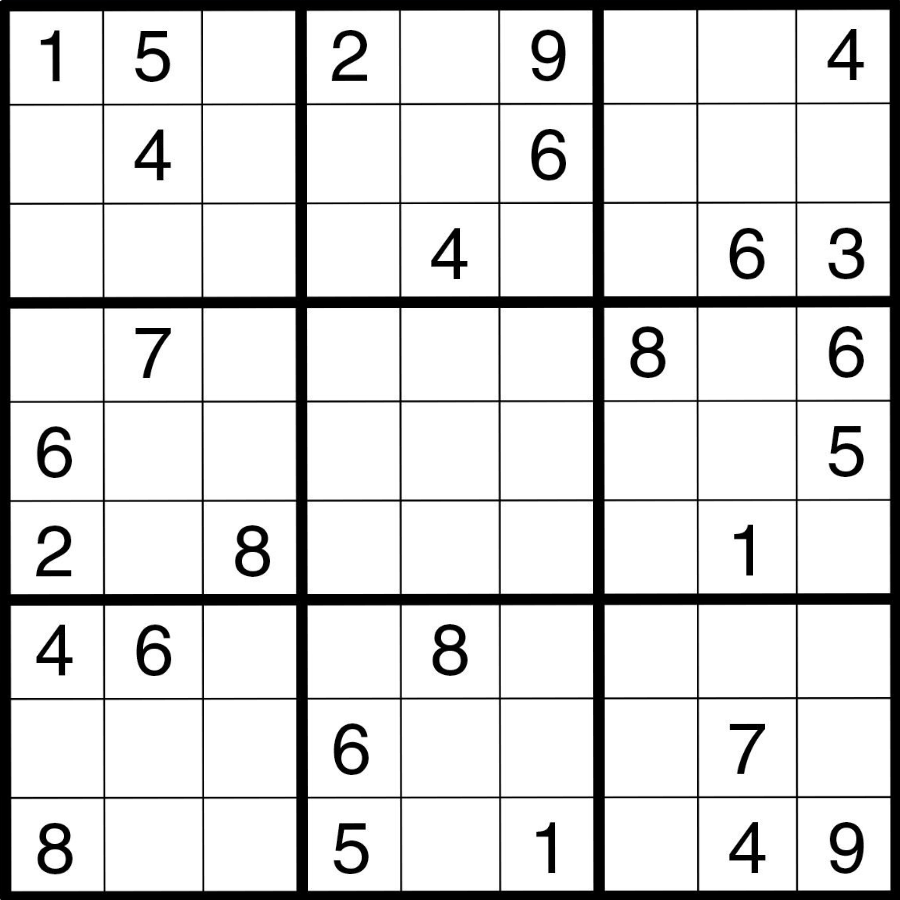

In [ ]:
simg,sloc=find_board(su)
cv2_imshow(simg)

In [ ]:
print(np.shape(simg))

(900, 900, 3)


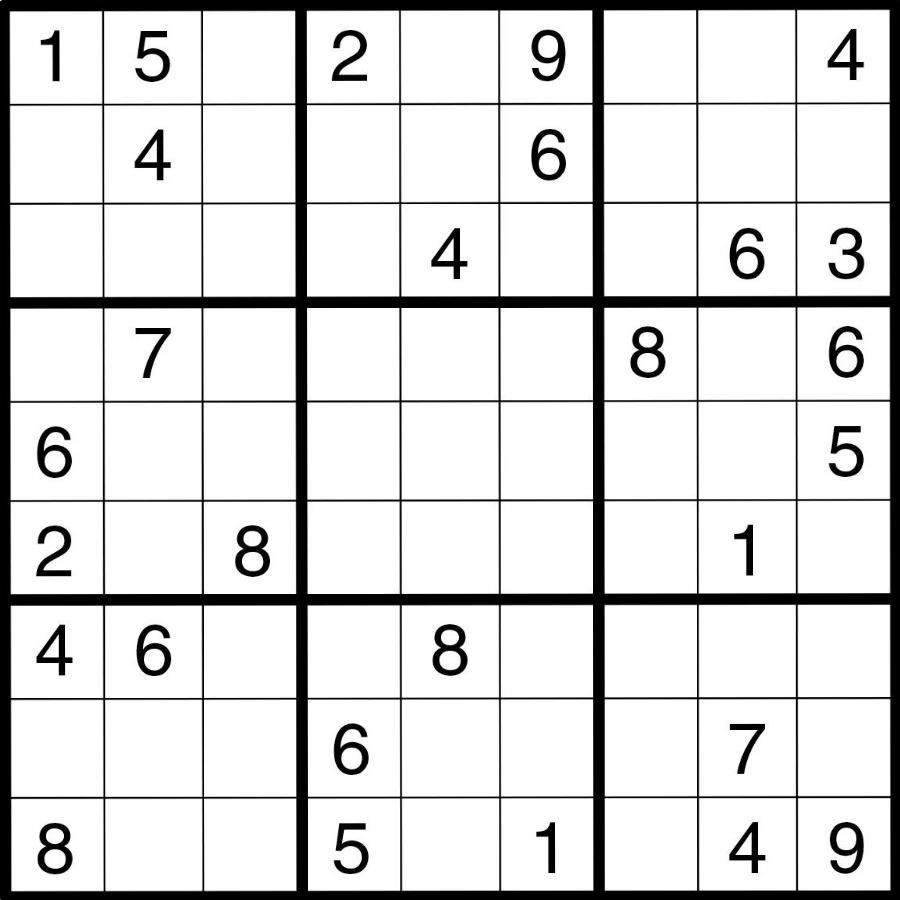

In [ ]:
gray=cv2.cvtColor(simg,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

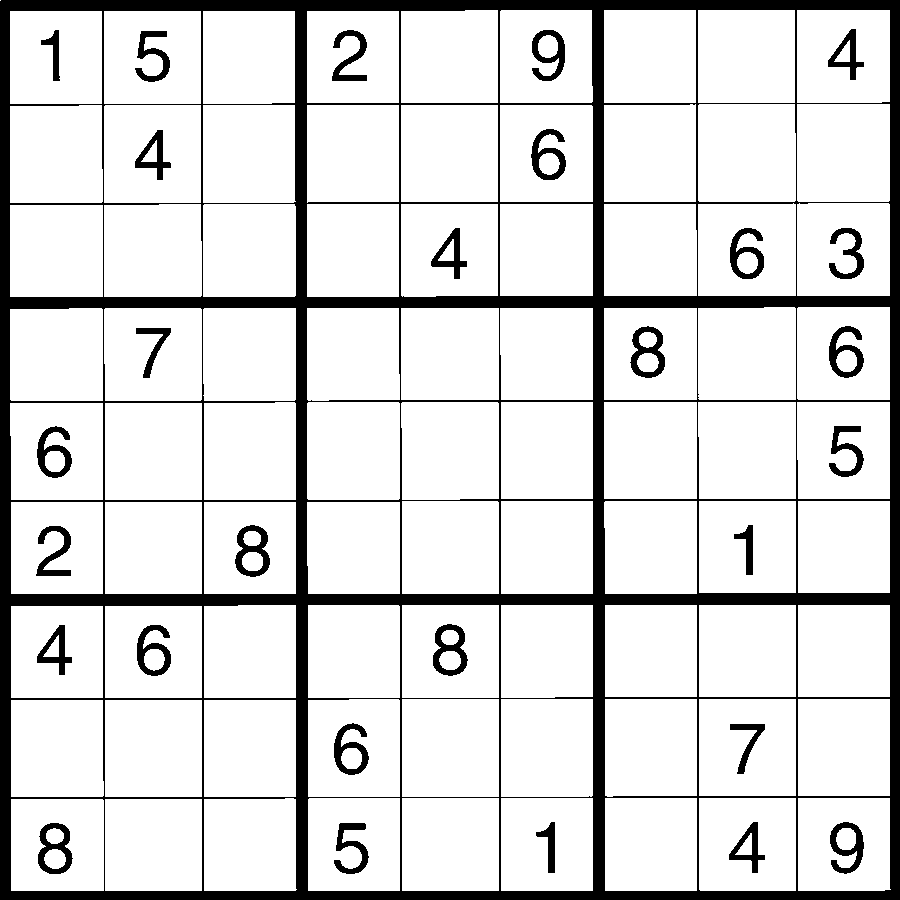

In [ ]:
et, thresh1 = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh1)

In [ ]:
print(np.shape(thresh1))

(900, 900)


In [ ]:
def count(img):
  m,n=np.shape(img)
  count=0
  for i in range(m):
    for j in range(n):
      count+=img[i][j]
  count=count/(m*n)
  return count

In [ ]:
print(count(thresh1))

219.3088148148148


In [ ]:
def transform(img):
  ct=count(img)
  m,n=np.shape(img)
  if(ct<100):
    return img
  else:
    for i in range(m):
      for j in range(n):
        img[i][j]=255-img[i][j]
    return img

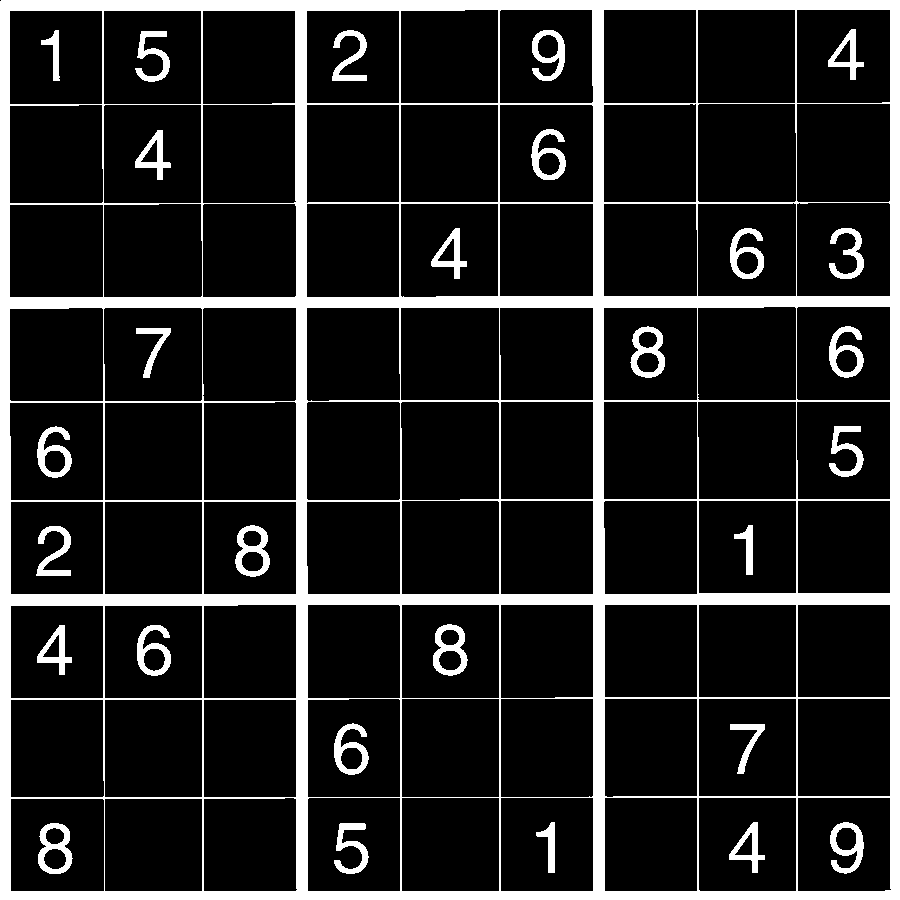

In [ ]:
neg=transform(thresh1)
cv2_imshow(neg)

In [ ]:
def split_boxes(board):
    """Takes a sudoku board and split it into 81 cells. 
        each cell contains an element of that board either given or an empty cell."""
    rows = np.vsplit(board,9)
    #print(len(rows))
    boxes = []
    
    for r in range(0,9):
      boxes+=[np.hsplit(rows[r],9)]
        
           
    cv2.destroyAllWindows()
    return boxes

In [ ]:
final=split_boxes(neg)

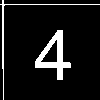

In [ ]:
cv2_imshow(final[1][1])

In [ ]:
import numpy as np

#matrix=[[3, 0, 2,1], [9, 5, 1,1], [1, 7, 4,2]]
#print(len(matrix)) #no.of rows 
#print(len(matrix[0])) #no.of columns

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K

In [ ]:
from keras.models import load_model
from PIL import ImageGrab, Image
import numpy as np
import cv2
model = load_model('/content/drive/MyDrive/practice/printed.h5')
def predict_digit(img):
    #resize image to 28x28 pixels
    #print(img.shape)
    img = cv2.resize(img, (28, 28))
    #convert rgb to grayscale
    #print(img.shape)
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #img = np.array(img)
    #reshaping for model normalization
    img = img.reshape(1,28,28,1)
    #img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)



In [ ]:
def get_digit(img):
  di,ac=predict_digit(img)
  return di

In [ ]:
print(get_digit(final[0][0]))

1/1 [==============================] - 1s 546ms/step
0


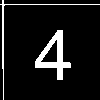

In [ ]:
cv2_imshow(final[1][1])

In [ ]:
print(np.shape(final[1][1]))

(100, 100)


In [ ]:
img2 = cv2.resize(final[1][1], (28, 28))
print(np.shape(img2))
img2 = img2.reshape(1,28,28,1)


(28, 28)


In [ ]:
res1 = model.predict([img2])[0]
d3=np.argmax(res1)

1/1 [==============================] - 0s 40ms/step


In [ ]:
print(d3)

4


In [ ]:
matrx=[]
row, cols=9,9
for i in range(row):
    col = []
    for j in range(cols):
        if count(final[i][j])>10:
          col.append(get_digit(final[i][j]))
        else:
          col.append(0)
    matrx.append(col)
        




1/1 [==============================] - 0s 37ms/step


In [ ]:
print(matrx)

[[0, 5, 0, 2, 0, 9, 0, 0, 4], [0, 4, 0, 0, 0, 6, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 6, 3], [0, 7, 0, 0, 0, 0, 8, 0, 6], [6, 0, 0, 0, 0, 0, 0, 0, 5], [2, 0, 8, 0, 0, 0, 0, 1, 0], [4, 6, 0, 0, 8, 0, 0, 0, 0], [0, 0, 0, 6, 0, 0, 0, 7, 0], [8, 0, 0, 5, 0, 1, 0, 4, 9]]


In [ ]:
# N is the size of the 2D matrix   N*N
N = 9
 
# A utility function to print grid
def printing(arr):
    for i in range(N):
        for j in range(N):
            print(arr[i][j], end = " ")
        print()
 
# Checks whether it will be
# legal to assign num to the
# given row, col
def isSafe(grid, row, col, num):
   
    # Check if we find the same num
    # in the similar row , we
    # return false
    for x in range(9):
        if grid[row][x] == num:
            return False
 
    # Check if we find the same num in
    # the similar column , we
    # return false
    for x in range(9):
        if grid[x][col] == num:
            return False
 
    # Check if we find the same num in
    # the particular 3*3 matrix,
    # we return false
    startRow = row - row % 3
    startCol = col - col % 3
    for i in range(3):
        for j in range(3):
            if grid[i + startRow][j + startCol] == num:
                return False
    return True
 
# Takes a partially filled-in grid and attempts
# to assign values to all unassigned locations in
# such a way to meet the requirements for
# Sudoku solution (non-duplication across rows,
# columns, and boxes) */
def solveSudoku(grid, row, col):
   
    # Check if we have reached the 8th
    # row and 9th column (0
    # indexed matrix) , we are
    # returning true to avoid
    # further backtracking
    if (row == N - 1 and col == N):
        return True
       
    # Check if column value  becomes 9 ,
    # we move to next row and
    # column start from 0
    if col == N:
        row += 1
        col = 0
 
    # Check if the current position of
    # the grid already contains
    # value >0, we iterate for next column
    if grid[row][col] > 0:
        return solveSudoku(grid, row, col + 1)
    for num in range(1, N + 1, 1):
       
        # Check if it is safe to place
        # the num (1-9)  in the
        # given row ,col  ->we
        # move to next column
        if isSafe(grid, row, col, num):
           
            # Assigning the num in
            # the current (row,col)
            # position of the grid
            # and assuming our assigned
            # num in the position
            # is correct
            grid[row][col] = num
 
            # Checking for next possibility with next
            # column
            if solveSudoku(grid, row, col + 1):
                return True
 
        # Removing the assigned num ,
        # since our assumption
        # was wrong , and we go for
        # next assumption with
        # diff num value
        grid[row][col] = 0
    return False
 
# Driver Code
 
# 0 means unassigned cells
#grid = [[3, 0, 6, 5, 0, 8, 4, 0, 0],
#        [5, 2, 0, 0, 0, 0, 0, 0, 0],
#        [0, 8, 7, 0, 0, 0, 0, 3, 1],
#        [0, 0, 3, 0, 1, 0, 0, 8, 0],
#        [9, 0, 0, 8, 6, 3, 0, 0, 5],
#        [0, 5, 0, 0, 9, 0, 6, 0, 0],
#        [1, 3, 0, 0, 0, 0, 2, 5, 0],
#        [0, 0, 0, 0, 0, 0, 0, 7, 4],
#        [0, 0, 5, 2, 0, 6, 3, 0, 0]]

grid=matrx
 
if (solveSudoku(grid, 0, 0)):
    printing(grid)
else:
    print("no solution  exists ")

1 5 6 2 3 9 7 8 4 
7 4 3 8 5 6 9 2 1 
9 8 2 1 4 7 5 6 3 
3 7 5 4 1 2 8 9 6 
6 1 4 9 7 8 2 3 5 
2 9 8 3 6 5 4 1 7 
4 6 9 7 8 3 1 5 2 
5 2 1 6 9 4 3 7 8 
8 3 7 5 2 1 6 4 9 
